In [1]:
from dna.config import BlackBoxDnaConfig, NGramsConfigGenerator
from models.config import CompletionModelConfig
from dna.model import BlackBoxDNADetector
from pydantic import SecretStr
import os
import dotenv

dotenv.load_dotenv()

True

In [8]:
model_config = CompletionModelConfig(
    api_key=SecretStr(os.getenv("OPENAI_API_KEY")),
    model_name="gpt-4o-mini",
    user_prompt="Complete the following sentences for a total of around {n_words} words:",
    system_prompt="You are a helpful assistant that continues the sentences provided.",
    temperature=0.5
)

ngrams_config = NGramsConfigGenerator()
"""
N_min=4,
N_max=25,
stemmer=PorterStemmer(),
func=lambda n: n * math.log(n),
stopwords=spacy.load("en_core_web_sm").Defaults.stop_words
"""

blackbox_config = BlackBoxDnaConfig(
    truncation=0.5,
    K=10,
    threshold=0.00025,
    model_config=model_config,
    ngrams_config=ngrams_config,
)

In [9]:
detector = BlackBoxDNADetector(blackbox_config)

In [10]:
from datasets import load_dataset

In [11]:
xlsum = load_dataset('anakib1/mango-truth', 'xlsum')

In [12]:
xlsum = xlsum.remove_columns(["prompt", "user_id"])

In [13]:
from tqdm import tqdm
import random

y_true, y_pred = [], []

for _ in tqdm(range(100)):
    i = random.randint(0, len(xlsum["train"]) - 1)
    proba = detector.predict_proba(xlsum["train"][i]["output"])
    y_true.append(1 if xlsum["train"][i]["label"] else 0)
    y_pred.append(proba[1])

100%|██████████| 100/100 [14:23<00:00,  8.63s/it]


SplitConclusion(metrics=ClassificationMetrics(tpr_at_1_percent_fpr=0.0005536568694463431, tpr_at_10_percent_fpr=0.005536568694463432, auc=0.051007147498375566, f1=0.020618556701030927, accuracy=0.05, precision=0.01282051282051282, recall=0.05263157894736842), representations=ClassificationRepresentations(roc_curve=<Figure size 640x480 with 1 Axes>, clf_report=<Figure size 640x480 with 2 Axes>))

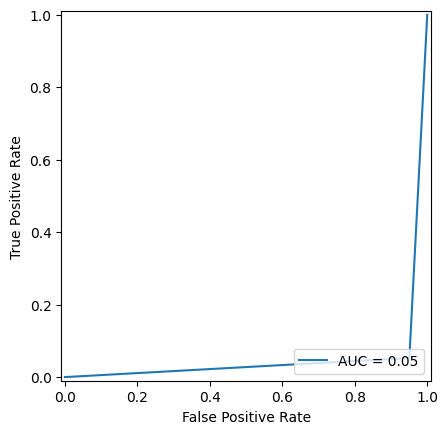

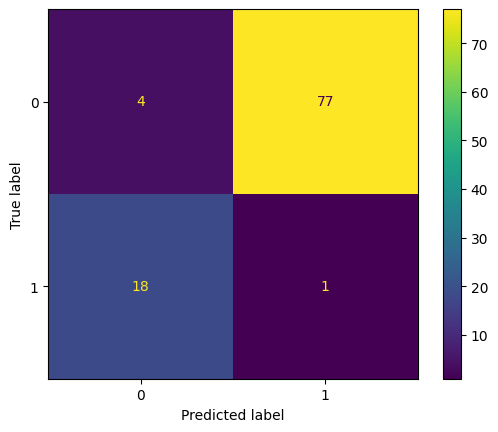

In [17]:
from utils.training import calculate_classification
import numpy as np

calculate_classification(np.array(y_true), np.array(y_pred))